In [21]:
#1. Read your Titanic dataset as usual: A training set and Testing set Apply decision tree. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv("titanic-passengers.csv", sep=';')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [22]:
df.Age = df.Age.fillna(df.Age.median())
num_survived = {'Survived':{'No':0, 'Yes':1}}
df.replace(num_survived, inplace = True)
num_sex = {'Sex':{'male':0, 'female':1}}
df.replace(num_sex, inplace = True)    
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",0,28.0,0,0,248740,13.0000,NaN,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",0,25.0,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",0,20.0,0,0,350050,7.8542,NaN,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29.0,0,4,349909,21.0750,NaN,S
4,672,0,1,"Davidson, Mr. Thornton",0,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,C
887,61,0,3,"Sirayanian, Mr. Orsen",0,22.0,0,0,2669,7.2292,NaN,C
888,535,0,3,"Cacic, Miss. Marija",1,30.0,0,0,315084,8.6625,NaN,S
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",0,28.0,0,0,349215,7.8958,NaN,S


In [23]:
df.drop('Cabin', axis=1, inplace=True)
df['Embarked'].fillna('S', inplace = True)
df.drop('PassengerId', axis=1, inplace=True)
df['Title']=0
df['Title']=df.Name.str.extract('([A-Za-z]+)\.')
df['Title'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col',
                         'Rev','Capt','Sir','Don'],['Miss','Miss','Mrs','Officer','Officer','Royalty','Royalty','Royalty','Officer','Officer','Officer','Royalty','Royalty'],inplace=True)
df.drop('Name', axis=1, inplace=True)
Embarked_one_hot = pd.get_dummies(df['Embarked'])
df = df.join(Embarked_one_hot)
df.drop('Embarked', axis=1, inplace=True)
df.drop('Ticket', axis=1, inplace=True)
for dataset in [df]:
    dataset['Familysize'] = dataset['SibSp'] + dataset['Parch'] +1
df.drop('SibSp', axis=1, inplace=True)
df.drop('Parch', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   Fare        891 non-null    float64
 5   Title       891 non-null    object 
 6   C           891 non-null    uint8  
 7   Q           891 non-null    uint8  
 8   S           891 non-null    uint8  
 9   Familysize  891 non-null    int64  
dtypes: float64(2), int64(4), object(1), uint8(3)
memory usage: 51.5+ KB


In [24]:
Title_one_hot = pd.get_dummies(df['Title'])
df = df.join(Title_one_hot)
df.drop('Title', axis=1, inplace=True)
df

,Survived,Pclass,Sex,Age,Fare,C,Q,S,Familysize,Master,Miss,Mr,Mrs,Officer,Royalty
0,0,2,0,28.0,13.0000,0,0,1,1,0,0,1,0,0,0
1,0,3,0,25.0,7.6500,0,0,1,1,0,0,1,0,0,0
2,0,3,0,20.0,7.8542,0,0,1,1,0,0,1,0,0,0
3,0,3,1,29.0,21.0750,0,0,1,5,0,0,0,1,0,0
4,0,1,0,31.0,52.0000,0,0,1,2,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,1,2,1,14.0,30.0708,1,0,0,2,0,0,0,1,0,0
887,0,3,0,22.0,7.2292,1,0,0,1,0,0,1,0,0,0
888,0,3,1,30.0,8.6625,0,0,1,1,0,1,0,0,0,0
889,0,3,0,28.0,7.8958,0,0,1,1,0,0,1,0,0,0


In [25]:
df.isnull().sum().sum()

0

In [26]:
df

,Survived,Pclass,Sex,Age,Fare,C,Q,S,Familysize,Master,Miss,Mr,Mrs,Officer,Royalty
0,0,2,0,28.0,13.0000,0,0,1,1,0,0,1,0,0,0
1,0,3,0,25.0,7.6500,0,0,1,1,0,0,1,0,0,0
2,0,3,0,20.0,7.8542,0,0,1,1,0,0,1,0,0,0
3,0,3,1,29.0,21.0750,0,0,1,5,0,0,0,1,0,0
4,0,1,0,31.0,52.0000,0,0,1,2,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,1,2,1,14.0,30.0708,1,0,0,2,0,0,0,1,0,0
887,0,3,0,22.0,7.2292,1,0,0,1,0,0,1,0,0,0
888,0,3,1,30.0,8.6625,0,0,1,1,0,1,0,0,0,0
889,0,3,0,28.0,7.8958,0,0,1,1,0,0,1,0,0,0


In [27]:
#2. Plot your decision tree and try to read the tree branches and conclude a prediction manually.

from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn import metrics 
x = df[['Pclass', 'Sex', 'Age', 'Fare', 'C', 'Q', 'S', 'Familysize', 'Master', 'Miss', 'Mr', 'Mrs', 'Officer', 'Royalty']]

y = df['Survived']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

clf = tree.DecisionTreeClassifier()  
clf.fit(x_train, y_train)   
y_pred=clf.predict(x_test)   
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.8212290502793296


In [28]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_1 <= 0.50
|   |--- feature_0 <= 1.50
|   |   |--- feature_2 <= 27.50
|   |   |   |--- feature_2 <= 24.50
|   |   |   |   |--- feature_2 <= 17.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_2 >  17.50
|   |   |   |   |   |--- feature_3 <= 71.28
|   |   |   |   |   |   |--- feature_4 <= 0.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_4 >  0.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_3 >  71.28
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- feature_2 >  24.50
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  27.50
|   |   |   |--- feature_3 <= 26.14
|   |   |   |   |--- class: 0
|   |   |   |--- feature_3 >  26.14
|   |   |   |   |--- feature_3 <= 26.47
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_3 >  26.47
|   |   |   |   |   |--- feature_2 <= 60.50
|   |   |   |   |   |   |--- feature_3 <= 37.00
|   |   |   |   |   |   |   |--- feature_3 <= 35.25
|   | 

In [29]:
x.columns

Index(['Pclass', 'Sex', 'Age', 'Fare', 'C', 'Q', 'S', 'Familysize', 'Master',
       'Miss', 'Mr', 'Mrs', 'Officer', 'Royalty'],
      dtype='object')

score:0.8212290502793296


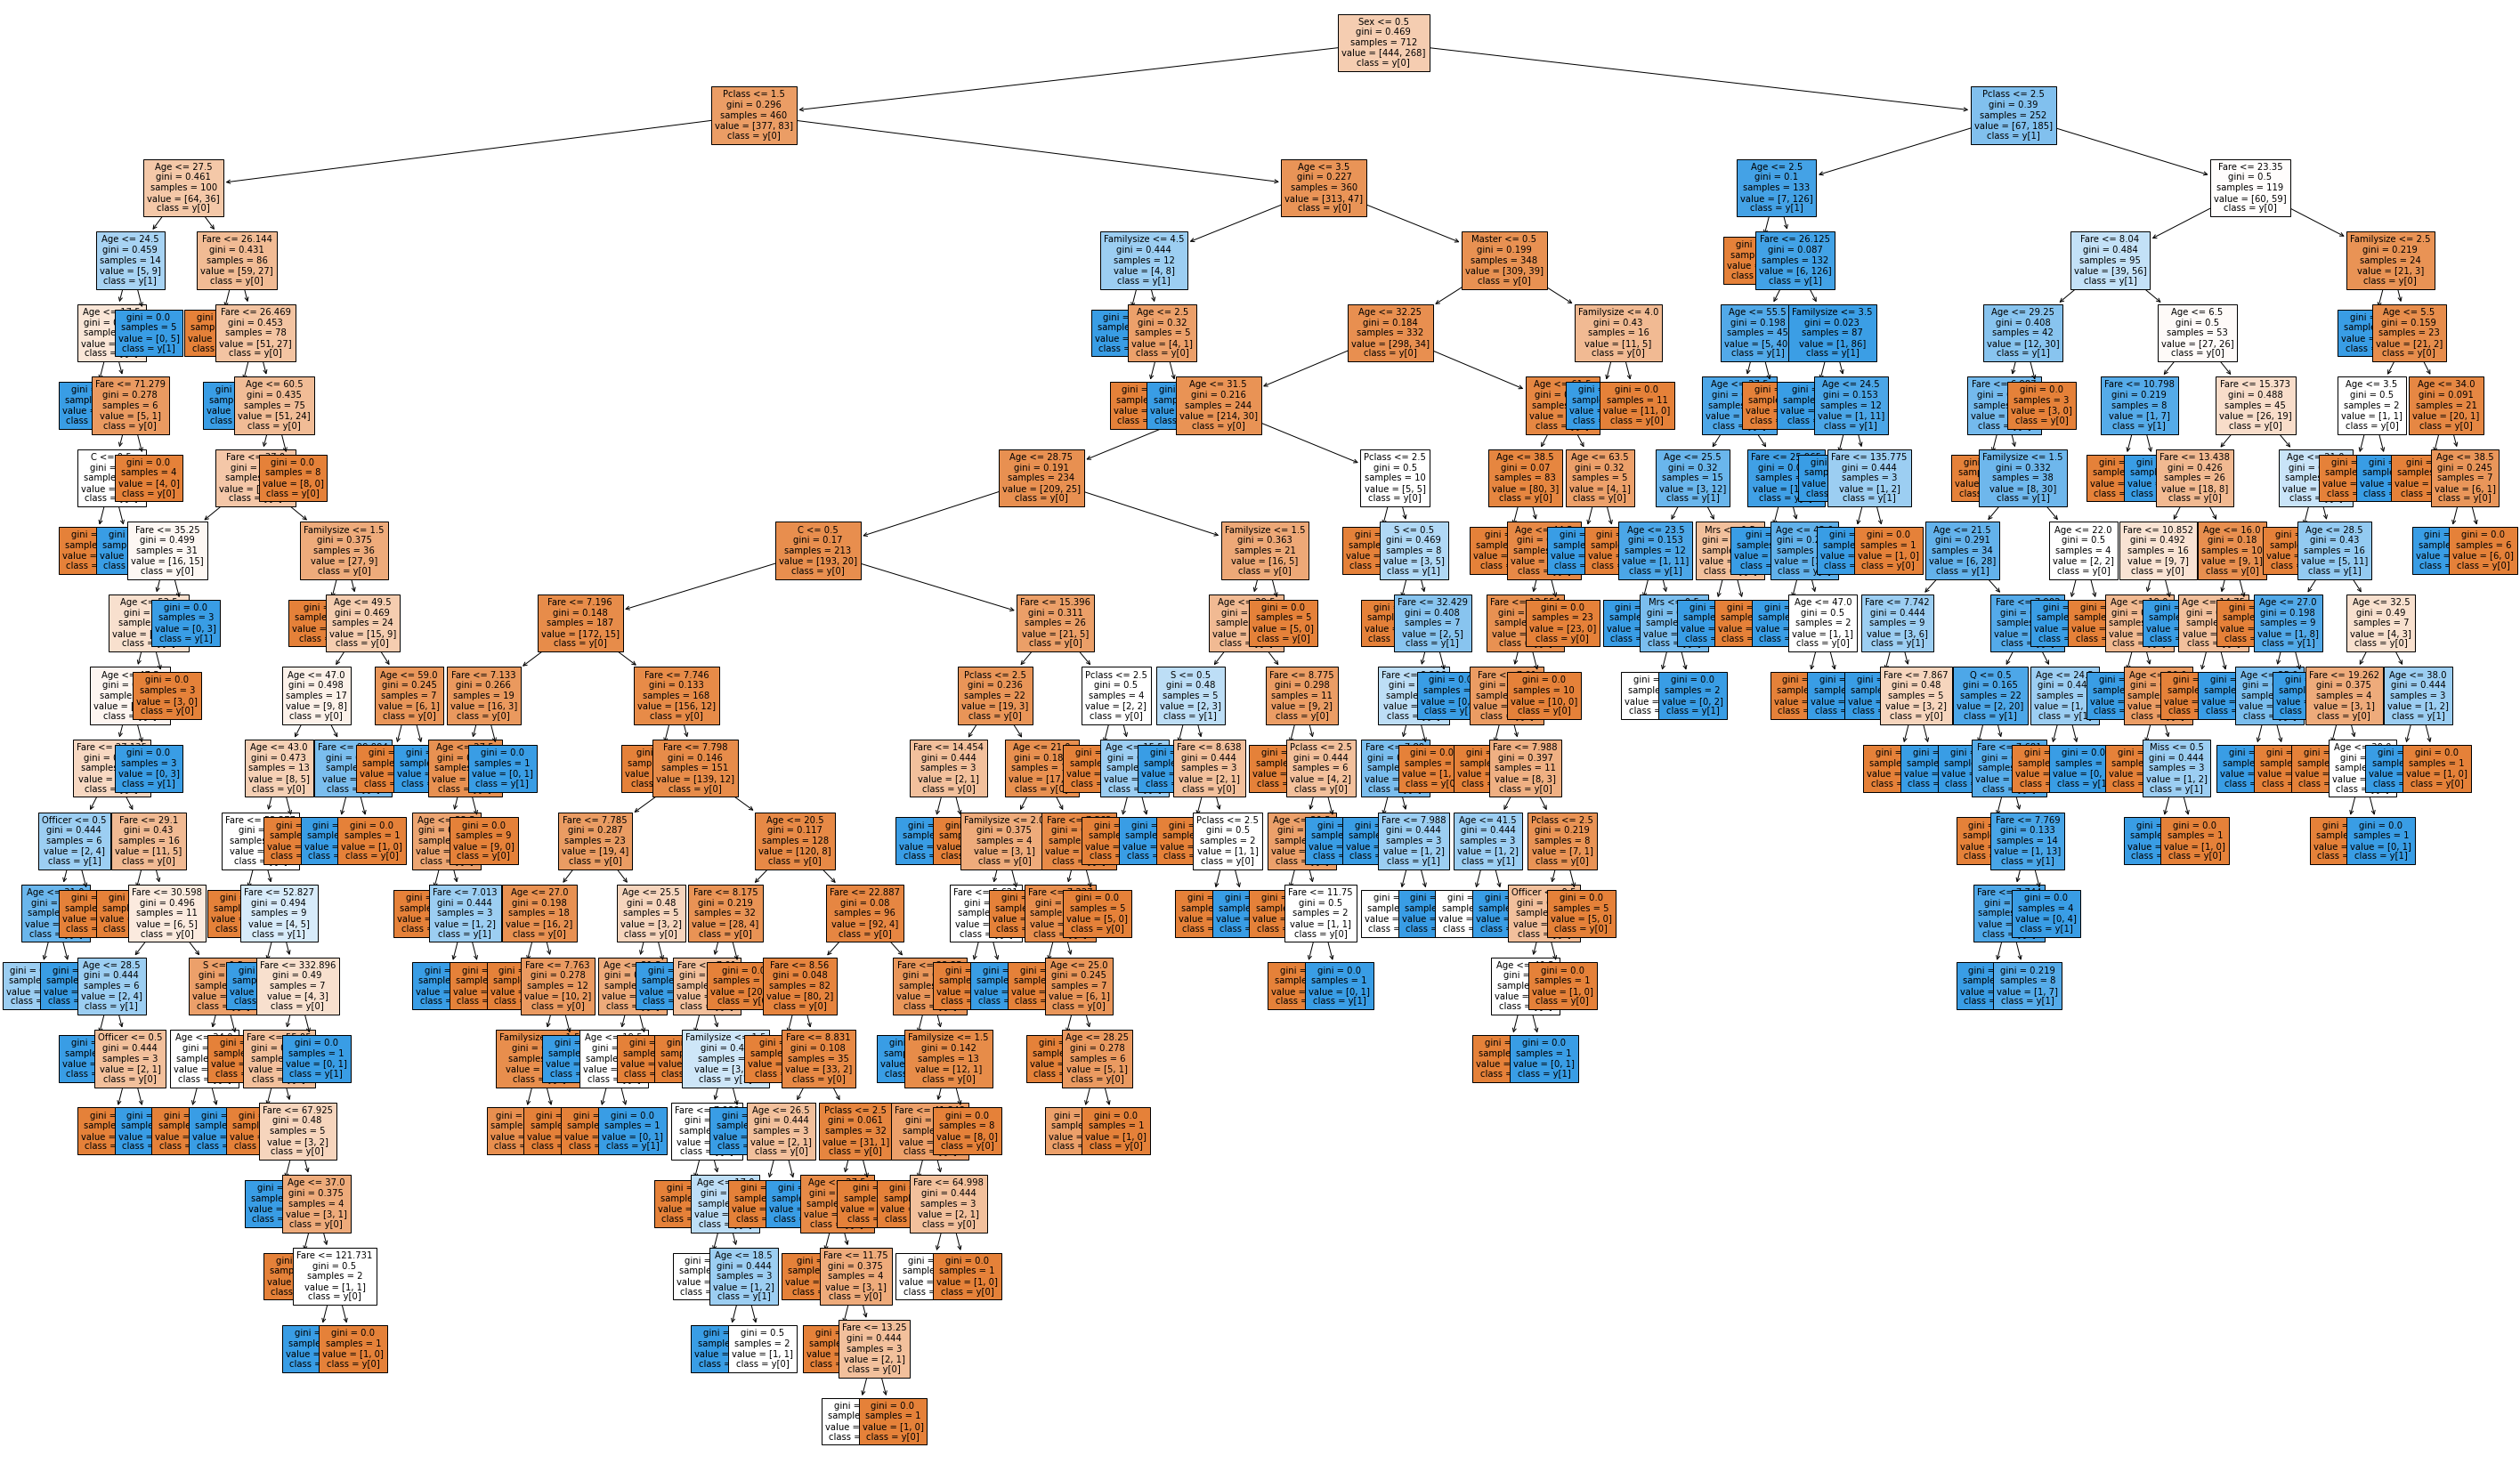

In [30]:
from sklearn import tree
fig, ax = plt.subplots(figsize=(50,30))
out = tree.plot_tree(clf, feature_names = x.columns, class_names = True, fontsize=10, filled=True)
print("score:{}".format(accuracy_score(y_test, y_pred)))

Read the tree branches and conclude a prediction manually.

If a passenger was a man, who was travelling in 2nd or 3rd class, was older than 3.5 years, held the title 'Master', and was part of a family with less than 4 members, he probably didn't survive the voyage. 

score:0.8212290502793296


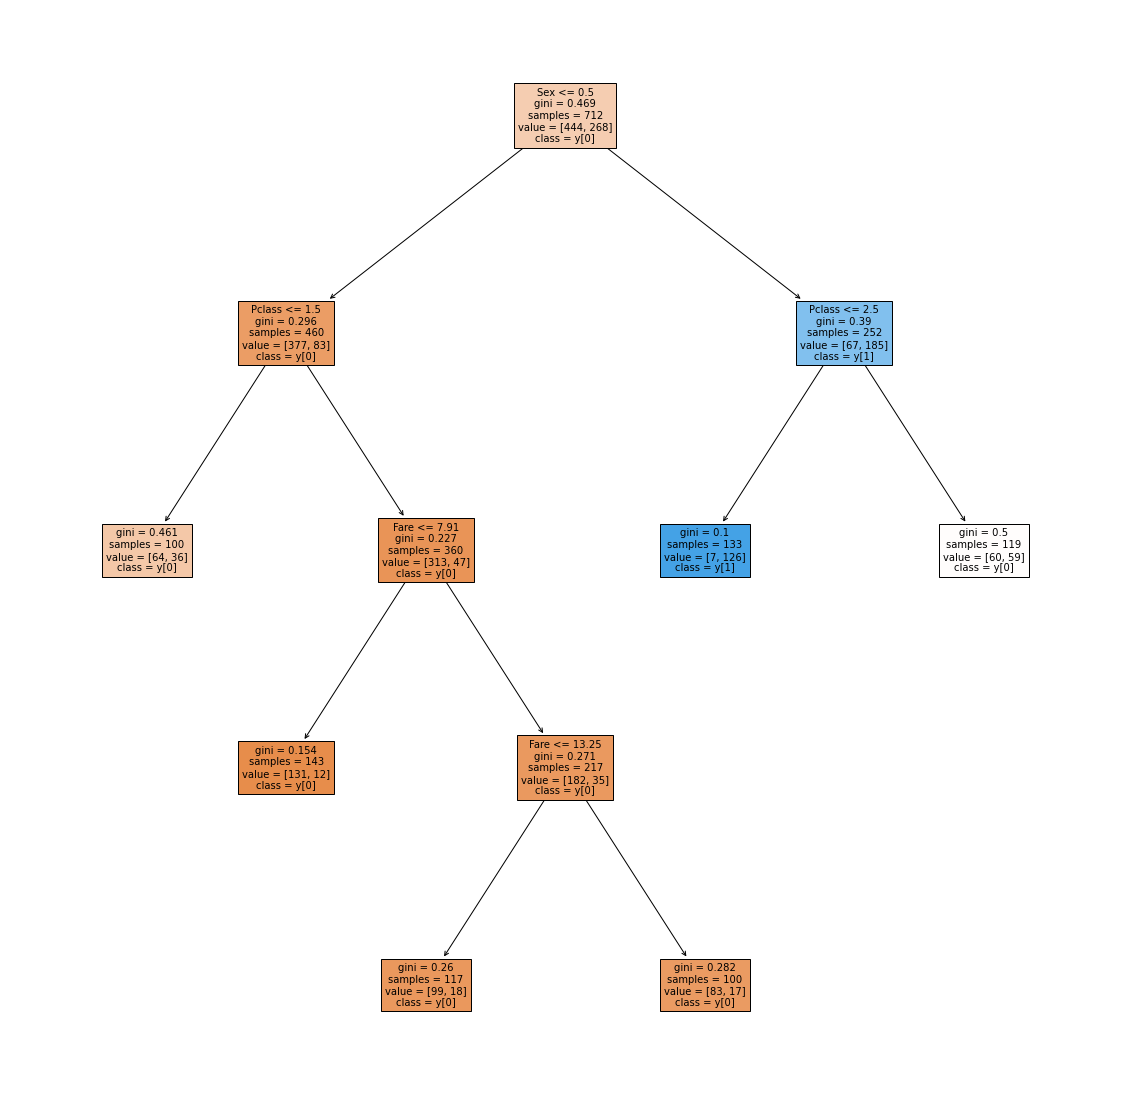

In [31]:
#3. Change the decision tree parameters(change at least two parameters)
#changed the minimu number of samples per leaf to 50
clf = tree.DecisionTreeClassifier(min_samples_leaf=100)  
clf.fit(x_train, y_train)
fig, ax = plt.subplots(figsize=(20,20))
out = tree.plot_tree(clf, feature_names = x.columns, class_names = True, fontsize=10, filled=True)
print("score:{}".format(accuracy_score(y_test, y_pred)))


score:0.8212290502793296


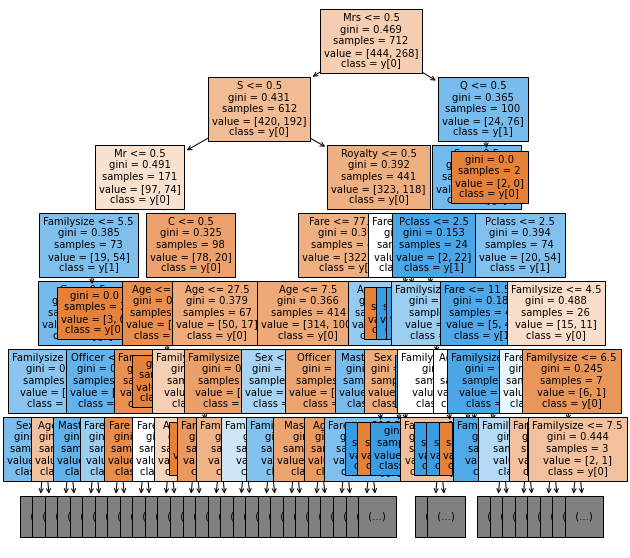

In [32]:
#changed the maximum number of features to consider when looking for the best split to 1
clf = tree.DecisionTreeClassifier(max_features = 1)  
clf.fit(x_train, y_train)
fig, ax = plt.subplots(figsize=(10,10))
out = tree.plot_tree(clf, feature_names = x.columns, max_depth=6, class_names = True, fontsize=10, filled=True)
print("score:{}".format(accuracy_score(y_test, y_pred)))


score:0.8212290502793296


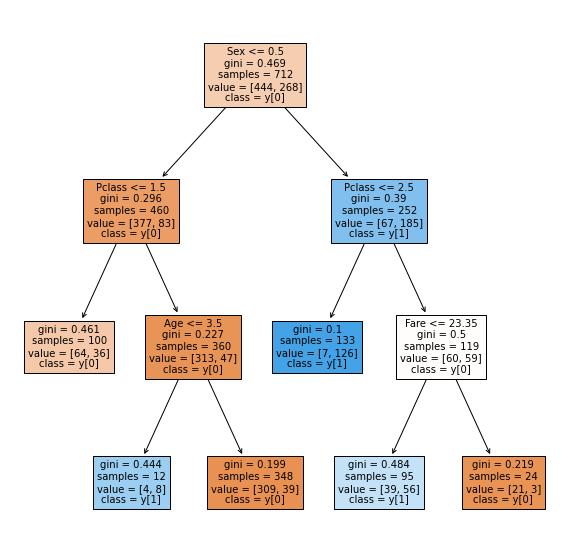

In [33]:
#Changed the minium impurity decrease for a split to 0.01
clf = tree.DecisionTreeClassifier(min_impurity_decrease = 0.01)  
clf.fit(x_train, y_train)
fig, ax = plt.subplots(figsize=(10,10))
out = tree.plot_tree(clf, feature_names = x.columns, max_depth=6, class_names = True, fontsize=10, filled=True)
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.8212290502793296


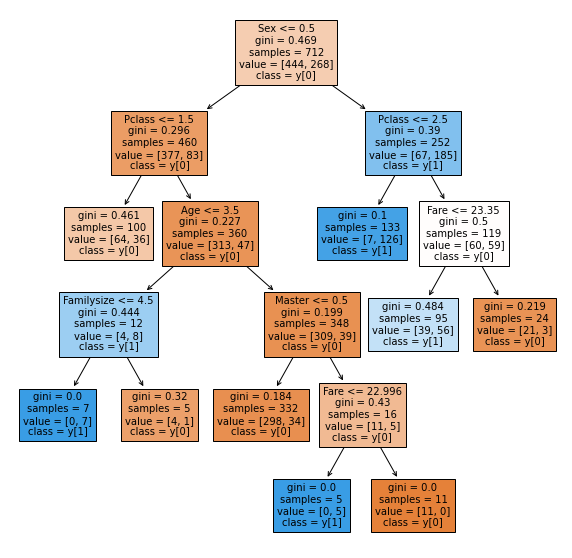

In [34]:
#Changed the complexity parameter used for minimal cost-complexity pruning to 0.005
clf = tree.DecisionTreeClassifier(ccp_alpha=0.005)  
clf.fit(x_train, y_train)
fig, ax = plt.subplots(figsize=(10,10))
out = tree.plot_tree(clf, feature_names = x.columns, max_depth=6, class_names = True, fontsize=10, filled=True)
print("score:{}".format(accuracy_score(y_test, y_pred)))

4. Calculate the new accuracy and compare it with the previous results. 
- score:0.8212290502793296
- score:0.8212290502793296
- score:0.8212290502793296
- score:0.8212290502793296
- score:0.8212290502793296

I changed the minimum number of samples per leaf, the maximum number of considered features per split, the minium impurity decrease, and the complexity parameter for minimal cost-complexity pruning. However, none of these parameters changed the accuracy of the tree. 

In [35]:
#5. Use random forest then change the number of estimators
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics 

x = df[['Pclass', 'Sex', 'Age', 'Fare', 'C', 'Q', 'S', 'Familysize', 'Master', 'Miss', 'Mr', 'Mrs', 'Officer', 'Royalty']]

y = df['Survived']
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3) 
clf=RandomForestClassifier(n_estimators=10)  
clf.fit(x_train, y_train)  
y_pred=clf.predict(x_test)  
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)) 

Accuracy: 0.8022388059701493


In [36]:
x = df[['Age', 'Fare', 'C', 'Q', 'Master', 'Miss', 'Officer', 'Royalty']]
y = df['Survived']
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3) 
clf=RandomForestClassifier(n_estimators=10)  
clf.fit(x_train, y_train)  
y_pred=clf.predict(x_test)  
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)) 

Accuracy: 0.664179104477612


In [37]:
x = df[['Pclass', 'Age', 'C', 'S', 'Master', 'Mr', 'Officer']]
y = df['Survived']
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3) 
clf=RandomForestClassifier(n_estimators=10)  
clf.fit(x_train, y_train)  
y_pred=clf.predict(x_test)  
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)) 

Accuracy: 0.8097014925373134


In [38]:
x = df[['Master', 'Miss', 'Mr', 'Mrs', 'Officer', 'Royalty']]
y = df['Survived']
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3) 
clf=RandomForestClassifier(n_estimators=10)  
clf.fit(x_train, y_train)  
y_pred=clf.predict(x_test)  
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)) 

Accuracy: 0.7574626865671642


In [39]:
x = df[['Pclass', 'Sex', 'Age', 'Fare']]
y = df['Survived']
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3) 
clf=RandomForestClassifier(n_estimators=10)  
clf.fit(x_train, y_train)  
y_pred=clf.predict(x_test)  
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)) 

Accuracy: 0.8283582089552238


6. Calculate the new accuracy and compare it with the previous result.

All estimators: 'Pclass', 'Sex', 'Age', 'Fare', 'C', 'Q', 'S', 'Familysize', 'Master', 'Miss', 'Mr', 'Mrs', 'Officer', 'Royalty'
- Accuracy: 0.8022388059701493
1. 'Age', 'Fare', 'C', 'Q', 'Master', 'Miss', 'Officer', 'Royalty'
- Accuracy: 0.664179104477612
2. 'Pclass', 'Age', 'C', 'S', 'Master', 'Mr', 'Officer'
- Accuracy: 0.8097014925373134
3. 'Master', 'Miss', 'Mr', 'Mrs', 'Officer', 'Royalty'
- Accuracy: 0.7574626865671642
4. 'Pclass', 'Sex', 'Age', 'Fare'
- Accuracy: 0.8283582089552238

The removal of estimators has a significant influence on the accuracy of my random forest. And which estimators you choose to remove or keep also has a significant influence on this. 

Example 1 shows us that the removal of the features Pclass, Sex, S, Mr, and Mrs, causes the accuracy to drop from 0.802 to 0.664. 

Example 2 shows us that the removal of the features Sex, Fare, Q, Familysize, Miss, Mrs, and Royalty, increases the accuracy from 0.802 to 0.809.

Example 3 shows us that the removal of the features Pclass, Sex, Age, Fare, C, Q, S, and Familysize, causes the accuracy to slightly drop from 0.802 to 0.757. 

Example 4 shows us that the removal of the features C, Q, S, Familysize, Master, Miss, Mr, Mrs, Officer, and Royalty, increases the accuracy from 0.802 to 0.828. 